In [1]:
# LINEAR REGRESSION MODELING FOR THE REALESTATE DB (((Rental Market)))

# Isolated into "TX" after national metrics

In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

import pyodbc # Engineered features in SQL and exported to *.csv

In [2]:
# NaN values filled with 24-mo average 

In [78]:
# read data into a DataFrame
rental = pd.read_csv('realestate_data/Rental_FullEDA_fillNaN.csv', parse_dates = ['Date'])

rental['R_Annual'] = np.rint(np.array(rental.R_Annual))
rental['R_Monthly'] = np.rint(np.array(rental.R_Monthly))
rental['R_PriorMonth'] = np.rint(np.array(rental.R_PriorMonth))
rental['R_DiffPrevMonth'] = np.rint(np.array(rental.R_DiffPrevMonth))
rental['R_60DayDiff'] = np.rint(np.array(rental.R_60DayDiff))
rental['R_60DayChange'] = np.rint(np.array(rental.R_60DayChange))
rental['R_90DayDiff'] = np.rint(np.array(rental.R_90DayDiff))
rental['R_90DayChange'] = np.rint(np.array(rental.R_90DayChange))

rental.head()

,Lstate,CityName,Date,R_Annual,R_Monthly,R_PriorMonth,R_DiffPrevMonth,R_60DayDiff,R_60DayChange,R_90DayDiff,R_90DayChange
0,AL,Birmingham,2014-01-01,11088.0,924.0,964.0,3.0,963.0,5.0,962.0,7.0
1,AL,Birmingham,2014-02-01,11328.0,944.0,924.0,20.0,964.0,5.0,963.0,7.0
2,AL,Birmingham,2014-03-01,11244.0,937.0,944.0,-7.0,924.0,13.0,964.0,7.0
3,AL,Birmingham,2014-04-01,11220.0,935.0,937.0,-2.0,944.0,-9.0,924.0,11.0
4,AL,Birmingham,2014-05-01,11244.0,937.0,935.0,2.0,937.0,0.0,944.0,-7.0


In [79]:
cols = ['R_Annual', 'R_Monthly', 'R_DiffPrevMonth', 'R_60DayChange', 'R_90DayChange']
states = rental[cols].groupby(rental['Lstate'])

In [80]:
print(states.mean())

                   R_Annual    R_Monthly  R_DiffPrevMonth  R_60DayChange  \
Lstate                                                                     
AL             12411.505618  1034.292135         3.033708       5.674157   
AR             10127.730337   843.977528         1.852273       3.885057   
AZ             13517.528090  1126.460674         2.451977       6.431818   
CA             23083.604494  1923.633708         1.946007       3.307432   
CO             17826.175281  1485.514607         0.409910       2.088036   
CT             18676.764045  1556.397004         4.488722       5.849057   
DC             23016.269663  1918.022472         3.215909       5.862069   
FL             16378.975281  1364.914607         0.797525       1.770270   
GA             13724.694340  1143.724528         2.367424       3.650190   
HI             26361.033708  2196.752809         7.431818      14.655172   
IA             12690.606742  1057.550562         2.159091       4.137931   
ID          

In [81]:
rental.describe()

,R_Annual,R_Monthly,R_PriorMonth,R_DiffPrevMonth,R_60DayDiff,R_60DayChange,R_90DayDiff,R_90DayChange
count,9419.000000,9419.000000,9379.000000,9379.000000,9339.000000,9339.000000,9299.000000,9299.000000
mean,15767.975794,1313.997983,1313.167182,1.775456,1312.566870,3.598244,1311.676094,5.413808
std,4897.914224,408.159519,408.108828,341.152266,408.291509,401.340392,407.978864,381.360359
min,6972.000000,581.000000,581.000000,-1637.000000,581.000000,-1653.000000,581.000000,-1639.000000
25%,12660.000000,1055.000000,1054.000000,-55.000000,1054.000000,-105.000000,1053.000000,-46.000000
50%,14460.000000,1205.000000,1204.000000,4.000000,1202.000000,6.000000,1201.000000,6.000000
75%,17316.000000,1443.000000,1441.500000,55.000000,1440.000000,112.500000,1439.000000,56.000000
max,37152.000000,3096.000000,3096.000000,1645.000000,3096.000000,1645.000000,3096.000000,1668.000000


In [82]:
rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9419 entries, 0 to 9418
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Lstate           9419 non-null   object        
 1   CityName         9419 non-null   object        
 2   Date             9419 non-null   datetime64[ns]
 3   R_Annual         9419 non-null   float64       
 4   R_Monthly        9419 non-null   float64       
 5   R_PriorMonth     9379 non-null   float64       
 6   R_DiffPrevMonth  9379 non-null   float64       
 7   R_60DayDiff      9339 non-null   float64       
 8   R_60DayChange    9339 non-null   float64       
 9   R_90DayDiff      9299 non-null   float64       
 10  R_90DayChange    9299 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 809.6+ KB


Text(0, 0.5, 'Lstate')

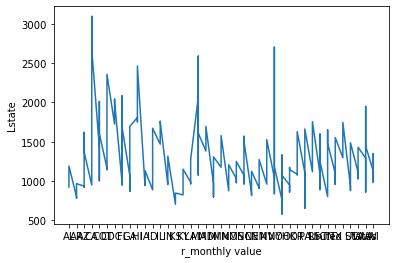

In [51]:
plt.plot(rental.Lstate, rental.R_Monthly)
plt.xlabel('r_monthly value')
plt.ylabel('Lstate')

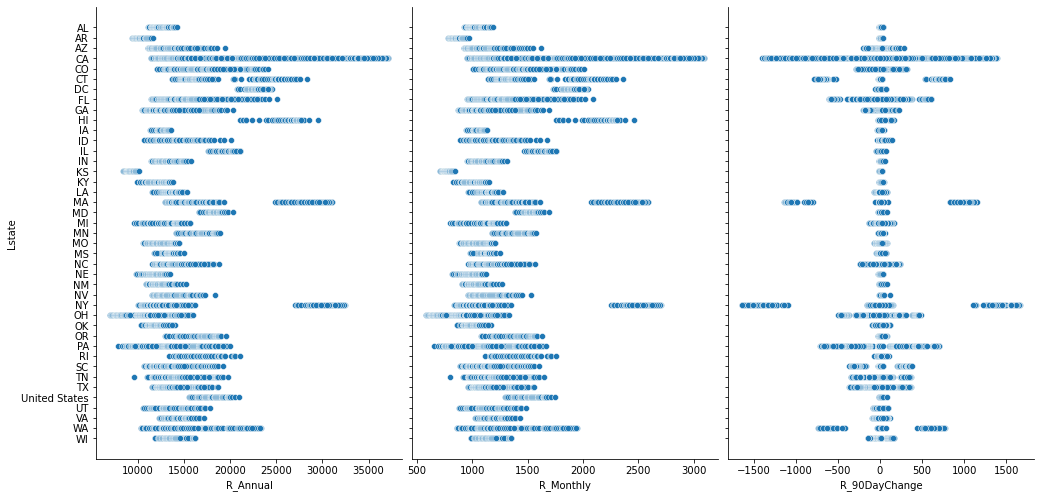

In [52]:
# scatter plot in Seaborn
sns.pairplot(rental\
             , x_vars=['R_Annual','R_Monthly','R_90DayChange']\
             , y_vars='Lstate', height=7, aspect=0.7\
            )

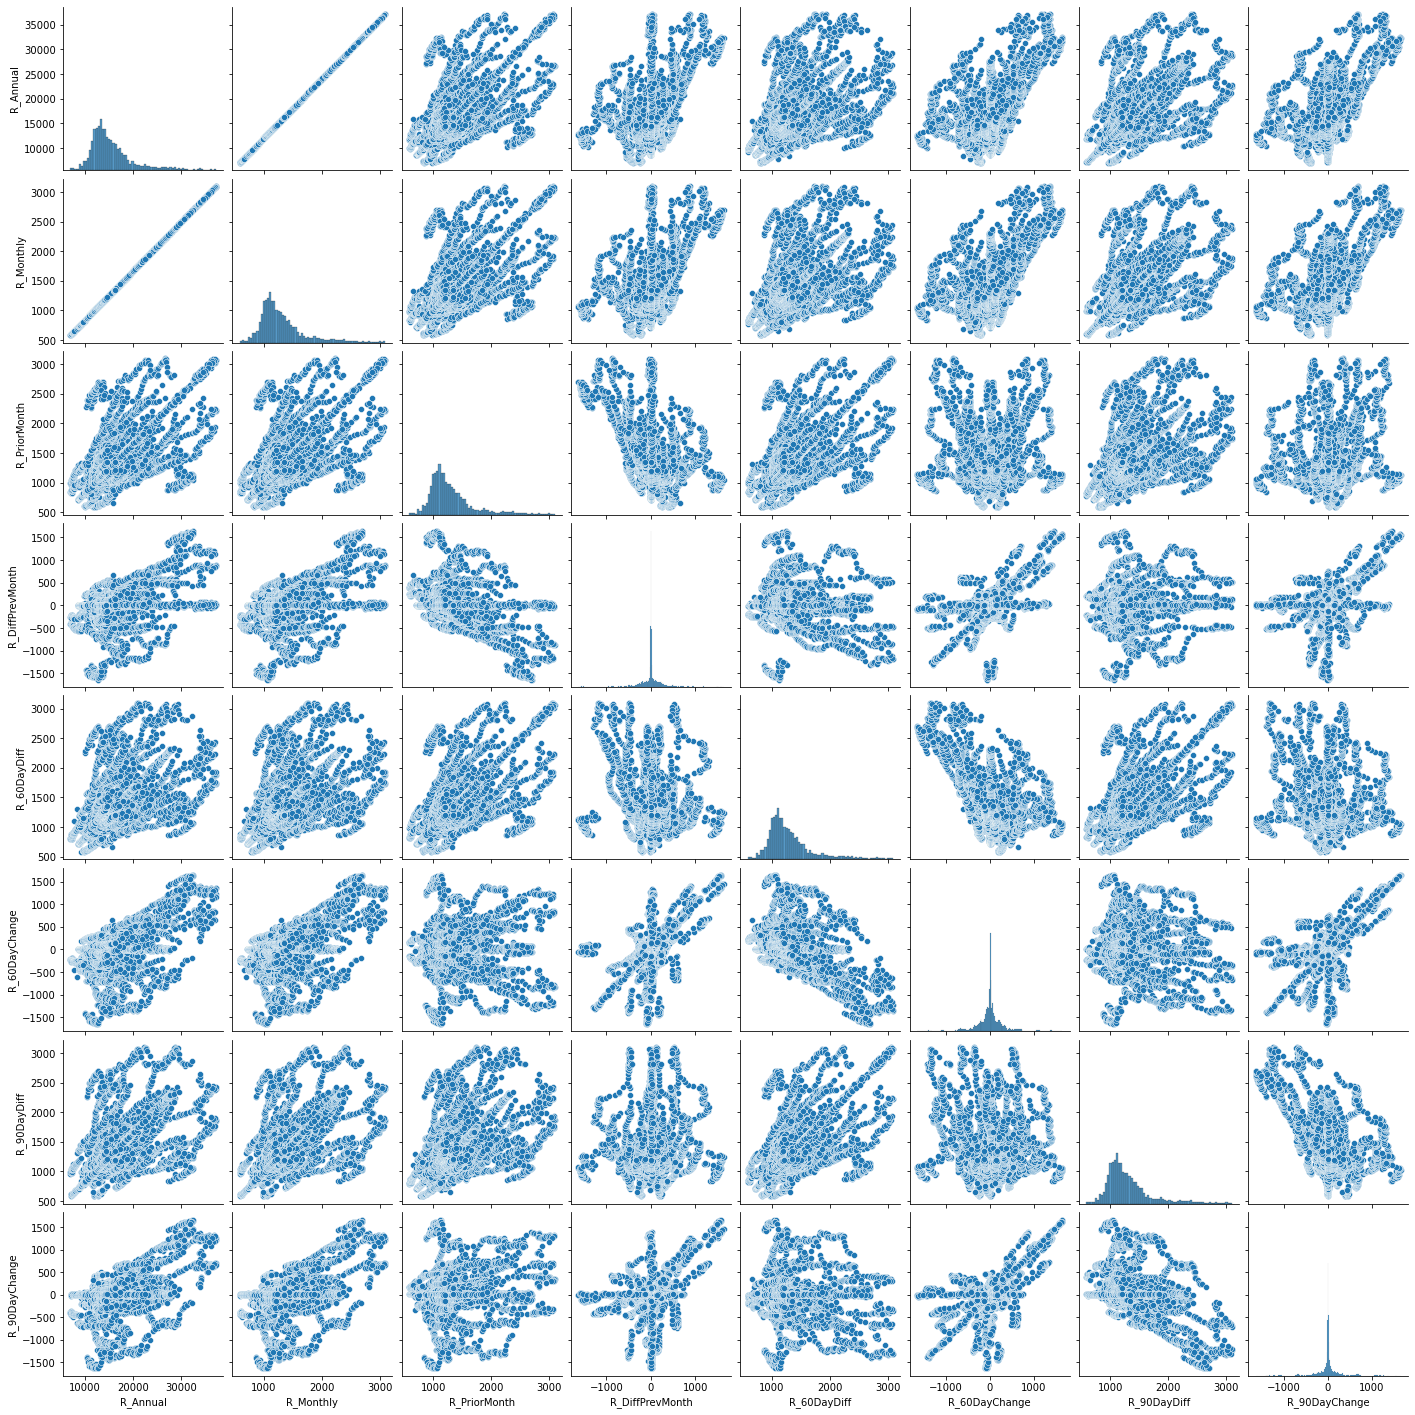

In [53]:
sns.pairplot(rental)

C:\Users\Blake\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='R_Monthly', ylabel='Density'>

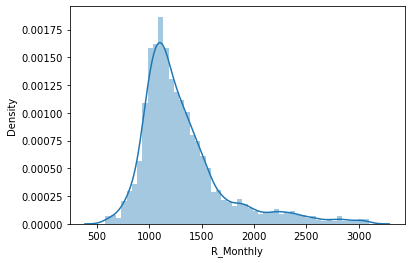

In [54]:
sns.distplot(rental.R_Monthly)

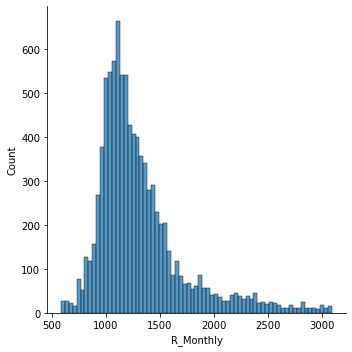

In [55]:
sns.displot(rental.R_Monthly)

<AxesSubplot:xlabel='R_Monthly', ylabel='Count'>

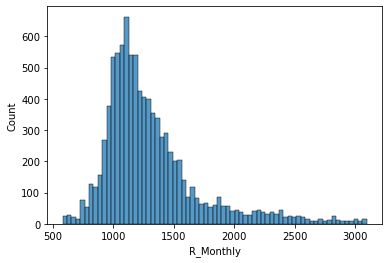

In [56]:
sns.histplot(rental.R_Monthly)

In [57]:
rental.R_Monthly.skew()

1.6987997201555392

In [58]:
rental.R_DiffPrevMonth.skew()

-0.012387665244214002

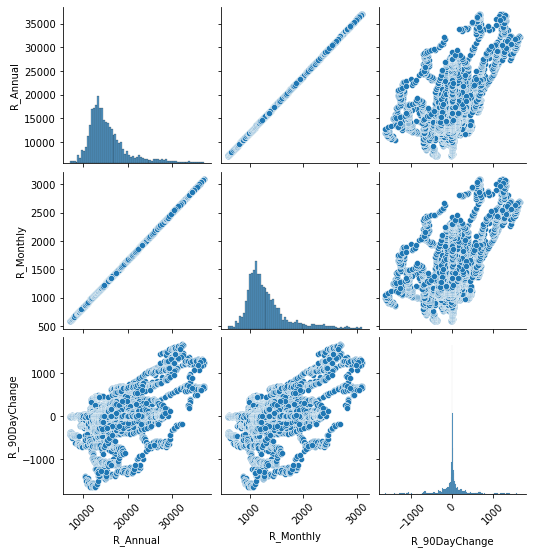

In [59]:
# scatter matrix in seaborn

g = sns.pairplot(rental[['R_Annual','R_Monthly','R_90DayChange']]\
                 , diag_kind="hist")

for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=45)

In [60]:
# compute correlation matrix

rental.corr()

,R_Annual,R_Monthly,R_PriorMonth,R_DiffPrevMonth,R_60DayDiff,R_60DayChange,R_90DayDiff,R_90DayChange
R_Annual,1.000000,1.000000,0.650821,0.418434,0.517176,0.491794,0.563794,0.468286
R_Monthly,1.000000,1.000000,0.650821,0.418434,0.517176,0.491794,0.563794,0.468286
R_PriorMonth,0.650821,0.650821,1.000000,-0.417243,0.650086,0.000443,0.516173,0.143963
R_DiffPrevMonth,0.418434,0.418434,-0.417243,1.000000,-0.158507,0.587559,0.057068,0.387611
R_60DayDiff,0.517176,0.517176,0.650086,-0.158507,1.000000,-0.490879,0.649639,-0.141363
R_60DayChange,0.491794,0.491794,0.000443,0.587559,-0.490879,1.000000,-0.087161,0.620154
R_90DayDiff,0.563794,0.563794,0.516173,0.057068,0.649639,-0.087161,1.000000,-0.465742
R_90DayChange,0.468286,0.468286,0.143963,0.387611,-0.141363,0.620154,-0.465742,1.000000


<AxesSubplot:>

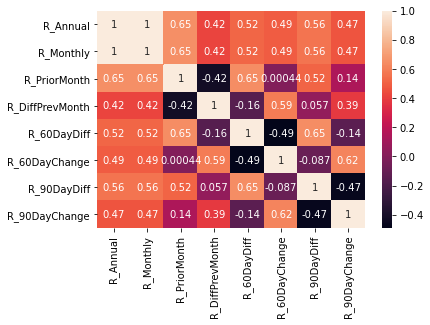

In [61]:
# correlation matrix heatmap 
sns.heatmap(rental.corr(), annot=True)

In [62]:
# reshape column data arrays for linear Regression
r_annual = np.int_(np.rint(np.array(rental.R_Annual)))
r_monthly = np.int_(np.rint(np.array(rental.R_Monthly)))
print(type(r_monthly))

r_diffprevmonth = np.int_(np.rint(np.array(rental.R_DiffPrevMonth)))
r_60daychange = np.int_(np.rint(np.array(rental.R_60DayChange)))
r_90daychange = np.int_(np.rint(np.array(rental.R_90DayChange)))

r_90daydiff = np.int_(np.rint(np.array(rental.R_90DayDiff)))

<class 'numpy.ndarray'>


In [63]:
# create X and y (((1)))
X = r_90daychange.reshape(-1,1)
y = r_monthly
# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)
# print the coefficients
print (linreg.intercept_)
print (linreg.coef_)

1317.0786439704261
[1.12599822e-07]


In [64]:
linreg.predict([[6]])

array([1317.07864465])

In [65]:
# calculate the R-squared value for the model

y_pred = linreg.predict(X)
metrics.r2_score(y, y_pred)

0.004414985637304802

In [66]:
y_pred

array([1317.07864476, 1317.07864476, 1317.07864476, ..., 1317.07864431,
       1317.07866131, 1317.07864555])

Text(0, 0.5, 'r_monthly value')

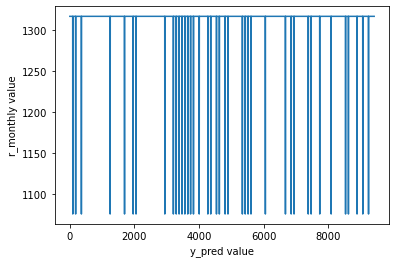

In [67]:
plt.plot(list(set(range(1,9420))), y_pred)
plt.xlabel('y_pred value')
plt.ylabel('r_monthly value')

In [68]:
rental.describe()

,R_Annual,R_Monthly,R_PriorMonth,R_DiffPrevMonth,R_60DayDiff,R_60DayChange,R_90DayDiff,R_90DayChange
count,9419.000000,9419.000000,9379.000000,9379.000000,9339.000000,9339.000000,9299.000000,9299.000000
mean,15767.975794,1313.997983,1313.167182,1.775456,1312.566870,3.598244,1311.676094,5.413808
std,4897.914224,408.159519,408.108828,341.152266,408.291509,401.340392,407.978864,381.360359
min,6972.000000,581.000000,581.000000,-1637.000000,581.000000,-1653.000000,581.000000,-1639.000000
25%,12660.000000,1055.000000,1054.000000,-55.000000,1054.000000,-105.000000,1053.000000,-46.000000
50%,14460.000000,1205.000000,1204.000000,4.000000,1202.000000,6.000000,1201.000000,6.000000
75%,17316.000000,1443.000000,1441.500000,55.000000,1440.000000,112.500000,1439.000000,56.000000
max,37152.000000,3096.000000,3096.000000,1645.000000,3096.000000,1645.000000,3096.000000,1668.000000


In [69]:
rental['Change_Ratio'] = (rental['R_DiffPrevMonth'] + rental['R_60DayChange'] + rental['R_90DayChange']) / rental.shape[0]
rental['Change_Ratio2'] = (rental['R_DiffPrevMonth']) / rental.shape[0]

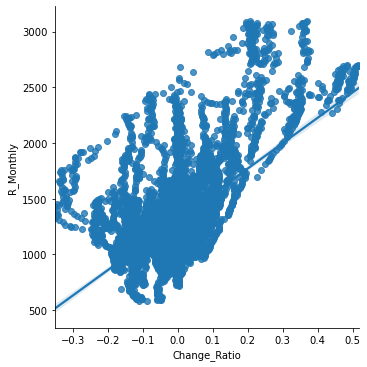

In [70]:
sns.lmplot(x="Change_Ratio", y="R_Monthly", data=rental, fit_reg=True)

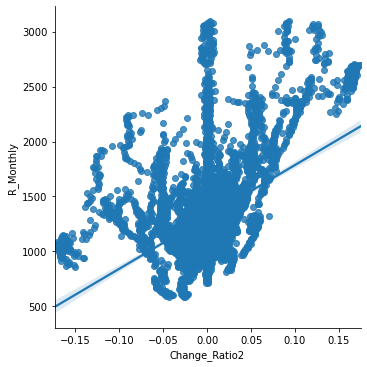

In [71]:
sns.lmplot(x="Change_Ratio2", y="R_Monthly", data=rental, fit_reg=True)

In [83]:
rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9419 entries, 0 to 9418
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Lstate           9419 non-null   object        
 1   CityName         9419 non-null   object        
 2   Date             9419 non-null   datetime64[ns]
 3   R_Annual         9419 non-null   float64       
 4   R_Monthly        9419 non-null   float64       
 5   R_PriorMonth     9379 non-null   float64       
 6   R_DiffPrevMonth  9379 non-null   float64       
 7   R_60DayDiff      9339 non-null   float64       
 8   R_60DayChange    9339 non-null   float64       
 9   R_90DayDiff      9299 non-null   float64       
 10  R_90DayChange    9299 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 809.6+ KB


In [73]:
change_ratio = np.int_(np.rint(np.array(rental.Change_Ratio)))
change_ratio2 = np.int_(np.rint(np.array(rental.Change_Ratio2)))

In [76]:
# create X and y

X = change_ratio2.reshape(-1, 1)
y = rental.R_Monthly

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients
print (linreg.intercept_)
print (linreg.coef_)

# pair the feature names with the coefficients
dict(zip(change_ratio2, linreg.coef_))

1314.9380530973451
[1.03080204e-07]


{0: 1.0308020426768112e-07}

In [84]:
rental_tx = rental[rental['Lstate']=='TX']
rental_tx

,Lstate,CityName,Date,R_Annual,R_Monthly,R_PriorMonth,R_DiffPrevMonth,R_60DayDiff,R_60DayChange,R_90DayDiff,R_90DayChange
8085,TX,Dallas-Fort Worth,2014-01-01,13212.0,1101.0,NaN,NaN,NaN,NaN,NaN,NaN
8086,TX,El Paso,2014-01-01,11916.0,993.0,1101.0,-108.0,NaN,NaN,NaN,NaN
8087,TX,Houston,2014-01-01,13668.0,1139.0,993.0,146.0,1101.0,38.0,NaN,NaN
8088,TX,San Antonio,2014-01-01,11556.0,963.0,1139.0,-176.0,993.0,-30.0,1101.0,-138.0
8089,TX,Austin,2014-01-01,13536.0,1128.0,963.0,165.0,1139.0,-11.0,993.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...
8525,TX,Dallas-Fort Worth,2021-05-01,18612.0,1551.0,1502.0,49.0,1191.0,360.0,1400.0,151.0
8526,TX,El Paso,2021-05-01,14568.0,1214.0,1551.0,-337.0,1502.0,-288.0,1191.0,23.0
8527,TX,Houston,2021-05-01,17232.0,1436.0,1214.0,222.0,1551.0,-115.0,1502.0,-66.0
8528,TX,San Antonio,2021-05-01,15372.0,1281.0,1436.0,-155.0,1214.0,67.0,1551.0,-270.0


In [85]:
rental_tx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 445 entries, 8085 to 8529
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Lstate           445 non-null    object        
 1   CityName         445 non-null    object        
 2   Date             445 non-null    datetime64[ns]
 3   R_Annual         445 non-null    float64       
 4   R_Monthly        445 non-null    float64       
 5   R_PriorMonth     444 non-null    float64       
 6   R_DiffPrevMonth  444 non-null    float64       
 7   R_60DayDiff      443 non-null    float64       
 8   R_60DayChange    443 non-null    float64       
 9   R_90DayDiff      442 non-null    float64       
 10  R_90DayChange    442 non-null    float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 41.7+ KB


Text(0, 0.5, 'r_monthly value')

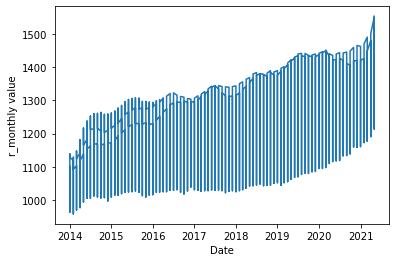

In [87]:
plt.plot(rental_tx.Date, rental_tx.R_Monthly)
plt.xlabel('Date')
plt.ylabel('r_monthly value')

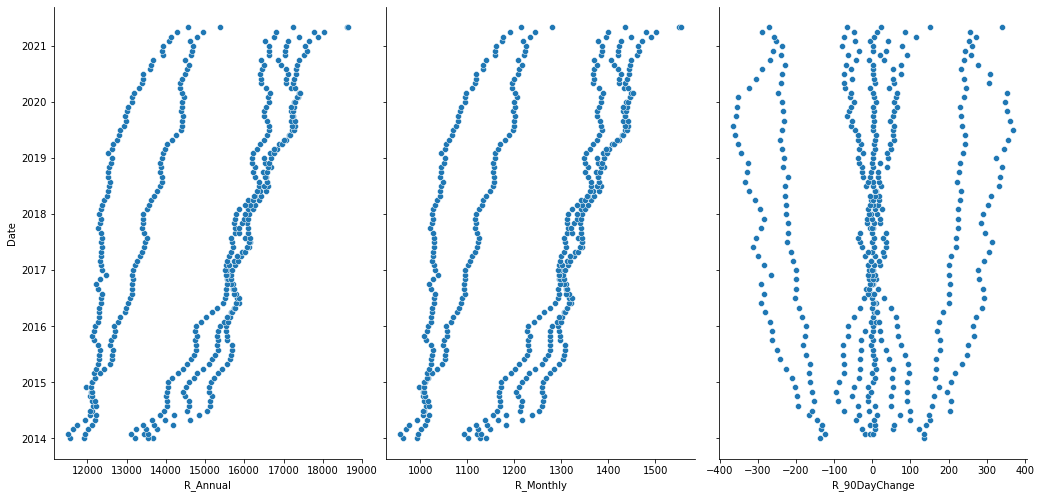

In [88]:
# scatter plot in Seaborn
sns.pairplot(rental_tx\
             , x_vars=['R_Annual','R_Monthly','R_90DayChange']\
             , y_vars='Date', height=7, aspect=0.7\
            )

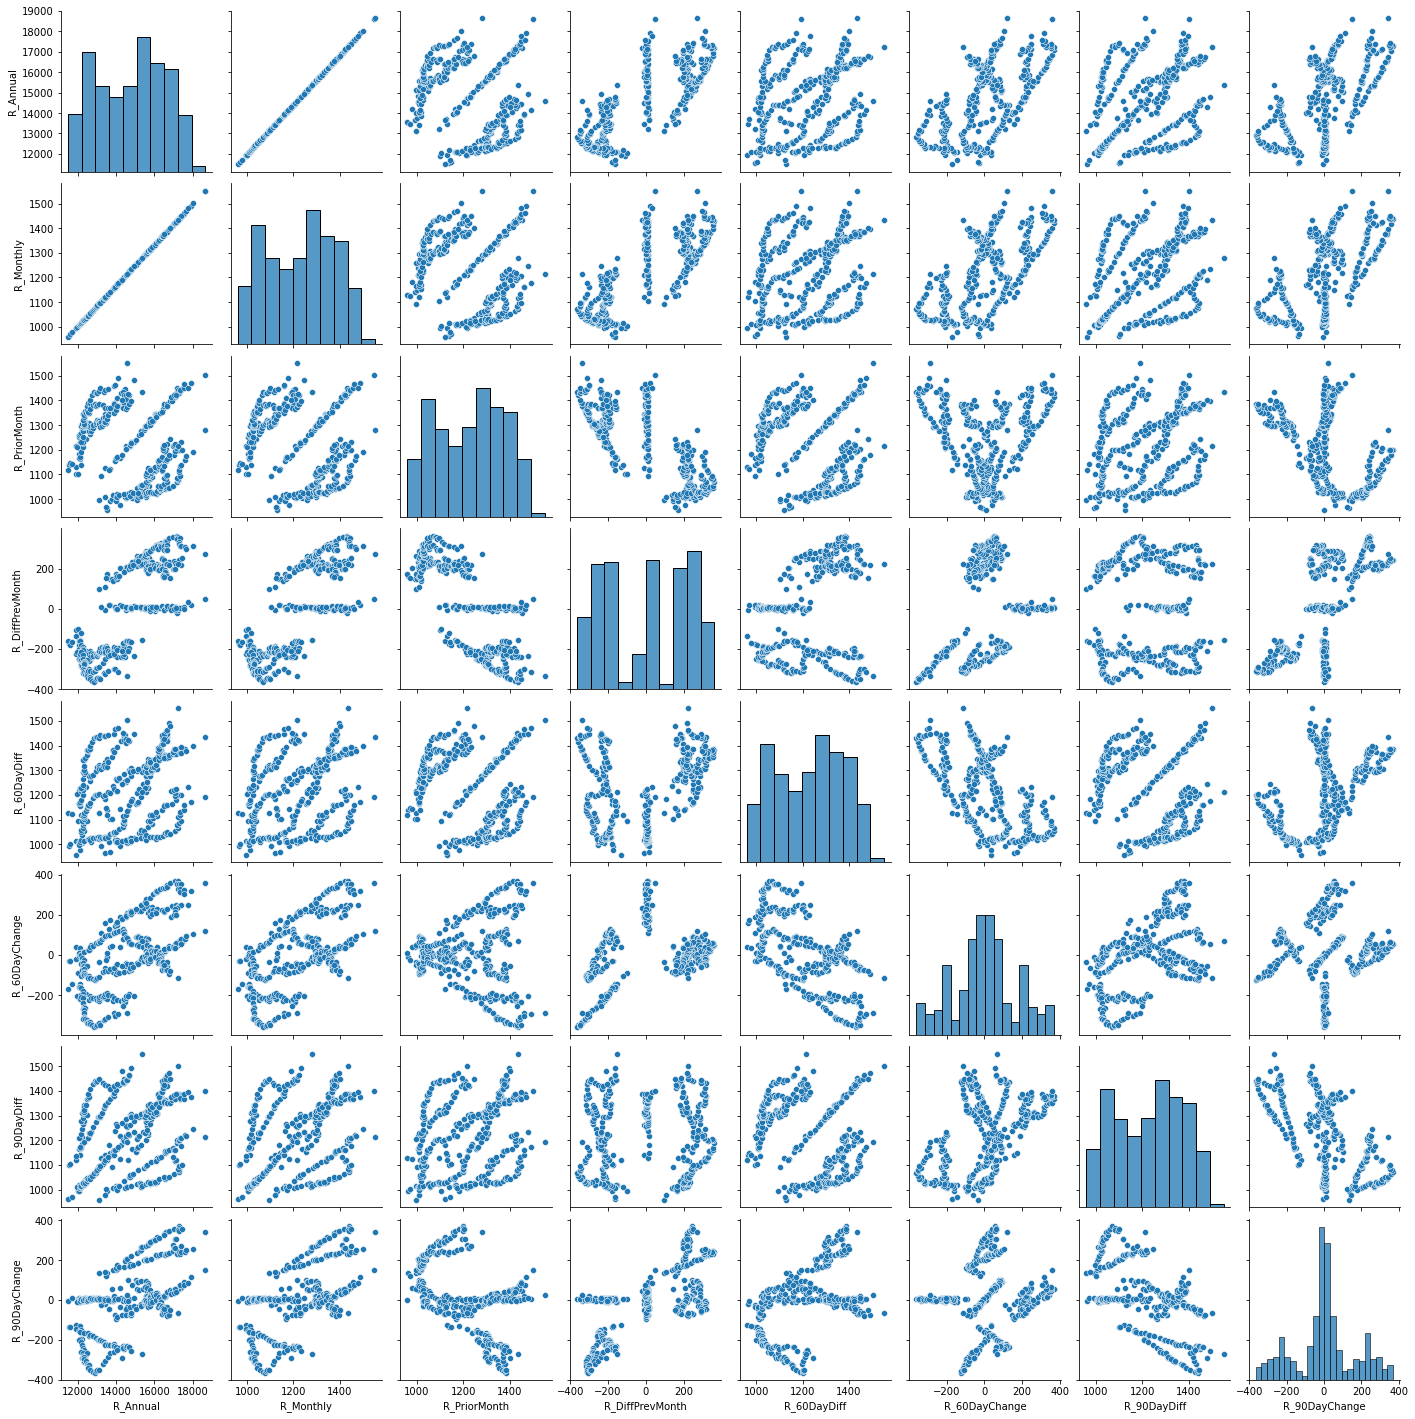

In [89]:
sns.pairplot(rental_tx)

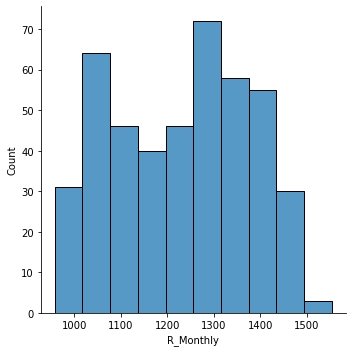

In [90]:
sns.displot(rental_tx.R_Monthly)

In [91]:
rental_tx.R_Monthly.skew()

-0.10049781303534636

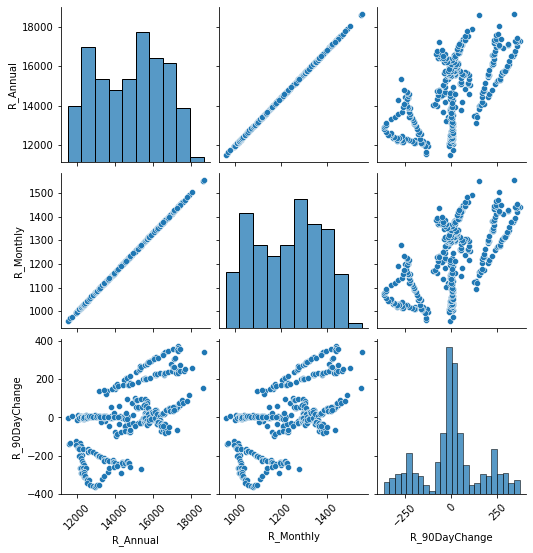

In [92]:
# scatter matrix in seaborn

g = sns.pairplot(rental_tx[['R_Annual','R_Monthly','R_90DayChange']]\
                 , diag_kind="hist")

for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=45)

In [93]:
rental_tx.corr()

,R_Annual,R_Monthly,R_PriorMonth,R_DiffPrevMonth,R_60DayDiff,R_60DayChange,R_90DayDiff,R_90DayChange
R_Annual,1.000000,1.000000,-0.181567,0.769904,0.336018,0.577292,0.362057,0.567064
R_Monthly,1.000000,1.000000,-0.181567,0.769904,0.336018,0.577292,0.362057,0.567064
R_PriorMonth,-0.181567,-0.181567,1.000000,-0.767341,-0.184473,-0.001288,0.331377,-0.460129
R_DiffPrevMonth,0.769904,0.769904,-0.767341,1.000000,0.338140,0.376229,0.021084,0.666393
R_60DayDiff,0.336018,0.336018,-0.184473,0.338140,1.000000,-0.575081,-0.186107,0.461757
R_60DayChange,0.577292,0.577292,-0.001288,0.376229,-0.575081,1.000000,0.475565,0.092372
R_90DayDiff,0.362057,0.362057,0.331377,0.021084,-0.186107,0.475565,1.000000,-0.562483
R_90DayChange,0.567064,0.567064,-0.460129,0.666393,0.461757,0.092372,-0.562483,1.000000


<AxesSubplot:>

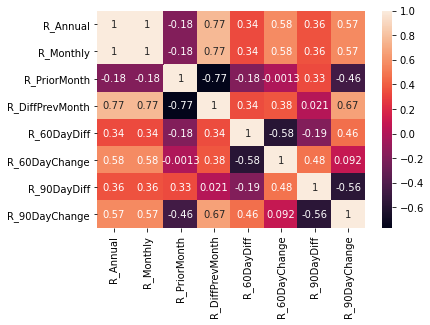

In [94]:
sns.heatmap(rental_tx.corr(), annot=True)

In [95]:
# reshape column data arrays for linear Regression
tx_annual = np.int_(np.rint(np.array(rental_tx.R_Annual)))
tx_monthly = np.int_(np.rint(np.array(rental_tx.R_Monthly)))
print(type(r_monthly))

tx_diffprevmonth = np.int_(np.rint(np.array(rental_tx.R_DiffPrevMonth)))
tx_60daychange = np.int_(np.rint(np.array(rental_tx.R_60DayChange)))
tx_90daychange = np.int_(np.rint(np.array(rental_tx.R_90DayChange)))

tx_90daydiff = np.int_(np.rint(np.array(rental_tx.R_90DayDiff)))

tx_date = rental_tx.Date

<class 'numpy.ndarray'>


In [110]:
# create X and y (((1)))
X = tx_monthly.reshape(-1,1)
y = tx_diffprevmonth
# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)
# print the coefficients
print (linreg.intercept_)
print (linreg.coef_)

-41526033.99971701
[29841.5645731]


In [111]:
linreg.predict([[6]])

array([-41346984.61227839])

In [130]:
# calculate the R-squared value for the model

y_pred = linreg.predict(X)
metrics.r2_score(y, y_pred)

0.00179441544228931

In [133]:
metrics?

In [131]:
y_pred

array([ -8670471.40473065, -11893360.37862577,  -7536491.95095273,
       -12788607.31581886,  -7864749.16125686,  -8103481.67784169,
       -12937815.13868437,  -7834907.59668376, -11833677.24947956,
        -8909203.92131547,  -8610788.27558444, -11624786.29746784,
        -7267917.86979481, -12609557.92838024,  -7984115.41954928,
        -7446967.25723343, -12370825.41179541,  -6253304.67430931,
       -11386053.78088302,  -8133323.24241479,  -7566333.51552584,
       -11236845.9580175 ,  -5208849.9142507 , -11863518.81405266,
        -6760611.27205206,  -6223463.1097362 , -11535261.60374853,
        -4582177.05821554, -11147321.26429819,  -7088868.48235619,
        -6820294.40119826, -11415895.34545612,  -4134553.589619  ,
       -11535261.60374853,  -5358057.73711622,  -5268533.04339691,
       -11326370.65173681,  -3925662.63760728, -11117479.69972509,
        -6641245.01375964,  -6641245.01375964, -11415895.34545612,
        -3895821.07303417, -11177162.82887129,  -5238691.47882

Text(0, 0.5, 'r_monthly value')

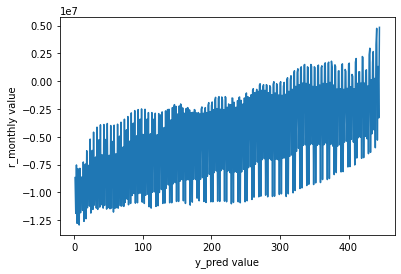

In [132]:
plt.plot(list(set(range(1,446))), y_pred)
plt.xlabel('y_pred value')
plt.ylabel('r_monthly value')

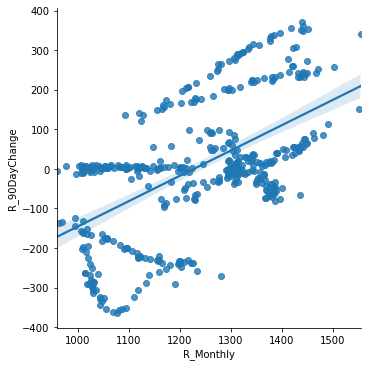

In [120]:
sns.lmplot(x="R_Monthly", y="R_90DayChange", data=rental_tx, fit_reg=True)

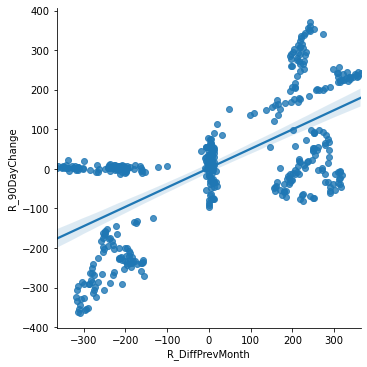

In [126]:
sns.lmplot(x="R_DiffPrevMonth", y="R_90DayChange", data=rental_tx, fit_reg=True)

array([[<AxesSubplot:xlabel='R_DiffPrevMonth', ylabel='R_DiffPrevMonth'>,
        <AxesSubplot:xlabel='R_60DayChange', ylabel='R_DiffPrevMonth'>,
        <AxesSubplot:xlabel='R_90DayChange', ylabel='R_DiffPrevMonth'>],
       [<AxesSubplot:xlabel='R_DiffPrevMonth', ylabel='R_60DayChange'>,
        <AxesSubplot:xlabel='R_60DayChange', ylabel='R_60DayChange'>,
        <AxesSubplot:xlabel='R_90DayChange', ylabel='R_60DayChange'>],
       [<AxesSubplot:xlabel='R_DiffPrevMonth', ylabel='R_90DayChange'>,
        <AxesSubplot:xlabel='R_60DayChange', ylabel='R_90DayChange'>,
        <AxesSubplot:xlabel='R_90DayChange', ylabel='R_90DayChange'>]],
      dtype=object)

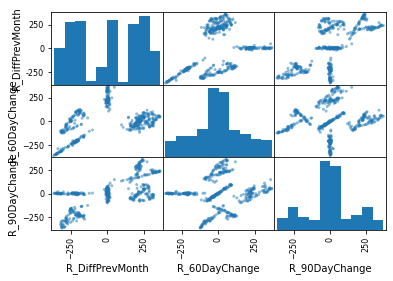

In [163]:
pd.plotting.scatter_matrix(rental_tx[['R_DiffPrevMonth', 'R_60DayChange', 'R_90DayChange']])

<AxesSubplot:xlabel='Date', ylabel='R_Monthly'>

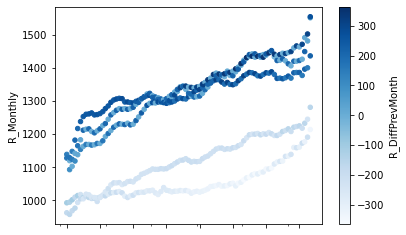

In [161]:
rental_tx.plot(kind='scatter', x='Date', y='R_Monthly', c='R_DiffPrevMonth', colormap='Blues')

<AxesSubplot:>

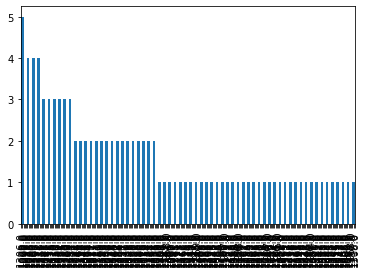

In [165]:
rental_tx.R_Monthly.value_counts().plot(kind='bar')